# Communicate Data Findings

# - Loan Data from Prosper

## Data description

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. [This data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set. we are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

So,going throught this notebook I tried to visual the data and get insights from it And want to use it to answer some questions like:

    - What is the frequency of EmploymentStatus value exist ?
    - What is the frequancy of IncomeRange values exist ?
    - What’s the most status for a loan ?
    - what is the Distribution of BorrowerRate?
    - what is the Distribution of Investors ?
    - what is the Distribution of LoanOriginationDate ?
    - What is the distribution od loan over days, months and years ?
    - what is the Distribution of LoanOriginalAmount ?
    - Is there any correlation between the features ?
And more question.

So, let`s go!

## Import Libraries

- Import a few libraries you think you'll need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

### Phase one: Data Gathering


In [2]:
# use pandas to read the csv filr of the dataset.
loan = pd.read_csv('prosperLoanData.csv')

### Phase two: Assessing Data

- first: Visually
- then: Programmatically

In [3]:
loan.shape

(113937, 81)

In [4]:
# set the max columns and rows to see all the columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# check the head of the data
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
#Check for number and percentage of Nulls
# Let's check number of null values for the data 
num_missing_values = loan.isna().sum()

# Getting the percentages of missing values with rounding down the result 
missing_values_percent = round(loan.isnull().sum(axis=0)*100/loan.shape[0],3)

# Concatenating the number and perecentage of missing values together into one dataframe and sorting it
pd.concat([num_missing_values, missing_values_percent], axis=1, 
          keys=['Count Missing Values', 'M.V. Percentage']).\
          sort_values(by="Count Missing Values", ascending=False)


,Count Missing Values,M.V. Percentage
GroupKey,100596,88.291
LoanFirstDefaultedCycleNumber,96985,85.122
ScorexChangeAtTimeOfListing,95009,83.387
ProsperPrincipalOutstanding,91852,80.616
ProsperPrincipalBorrowed,91852,80.616
ProsperPaymentsOneMonthPlusLate,91852,80.616
ProsperPaymentsLessThanOneMonthLate,91852,80.616
OnTimeProsperPayments,91852,80.616
TotalProsperLoans,91852,80.616
TotalProsperPaymentsBilled,91852,80.616


In [9]:
# Removing columns that contains 25 percent of missing values
print(missing_values_percent.shape)
missing_values_percent = missing_values_percent[missing_values_percent < 3]
missing_values_percent
print(missing_values_percent.shape)


(81,)
(49,)


In [10]:
missing_values_percent.index

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrin

###### check for duplicates in the dataset

In [11]:
# check for duplicates in the dataset
sum(loan.duplicated())

0

In [12]:
loan['ListingKey'].duplicated().value_counts()


False    113066
True        871
Name: ListingKey, dtype: int64

In [13]:
loan['ListingNumber'].duplicated().value_counts()


False    113066
True        871
Name: ListingNumber, dtype: int64

In [14]:
loan['LoanKey'].duplicated().value_counts()

False    113066
True        871
Name: LoanKey, dtype: int64

In [15]:
loan['MemberKey'].duplicated().value_counts()

False    90831
True     23106
Name: MemberKey, dtype: int64

In [16]:
# check if the duplicated rows at ListingNumber, ListingKey and LoanKey ??!
loan[((loan['ListingNumber'].duplicated())&(loan['ListingKey'].duplicated()))& (loan['LoanKey'].duplicated())]['ListingNumber'].count()

871

###### see value_counts for many columns

In [17]:
print(loan['CreditGrade'].value_counts())
print('\n ')
print('Num of null:', sum(loan['CreditGrade'].isna()))
print('\n')

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

 
Num of null: 84984




In [18]:
print(loan['Occupation'].value_counts())
print('\n ')
print('Num of null:', sum(loan['Occupation'].isna()))
print('\n')

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [19]:
print(loan['EmploymentStatus'].value_counts())
print('\n ')
print('Num of null:', sum(loan['EmploymentStatus'].isna()))
print('\n')

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

 
Num of null: 2255




In [20]:
print(loan['IsBorrowerHomeowner'].value_counts())
print('\n ')
print('Num of null:', sum(loan['IsBorrowerHomeowner'].isna()))
print('\n')

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

 
Num of null: 0




In [21]:
print(loan['CurrentlyInGroup'].value_counts())
print('\n ')
print('Num of null:', sum(loan['CurrentlyInGroup'].isna()))
print('\n')

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

 
Num of null: 0




In [22]:
print(loan['IncomeRange'].value_counts())
print('\n ')
print('Num of null:', sum(loan['IncomeRange'].isna()))
print('\n')

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

 
Num of null: 0




#### Extract the features of interest 

`Term, LoanStatus, BorrowerRate, EmploymentStatus, IncomeRange, Investors, Recommendations, LoanOriginationQuarter, LoanOriginationDate, LoanOriginalAmount, StatedMonthlyIncome, DelinquenciesLast7Years, LenderYield, ProsperRating (Alpha), IsBorrowerHomeowner, PercentFunded, ListingCategory(numeric)`

### Define:

- 871 duplicated rows at ListingNumber, ListingKey and LoanKey
- many columns with null values
- many columns we do not need so drop them
- some columns need to turn its type into date type and maybe split it into columns if needed                           like: ListingCreationDate, ClosedDate and DateCreditPulled
- some categries columns need to apply get dummies on it
- split some columns into two columns like: LoanOriginationQuarter
- remove the ($) from the columns IncomeRange


### Phase three: Cleaning Data

- clean the data and fix all the defined problems above.

In [23]:
# make acopy of the data before start cleaning
loan_clean = loan.copy()

In [24]:
loan_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

- keep only the features of interest and drop the rest. 

In [25]:
# extract the features of interest 
loan_sub =  [ 'Term', 'LoanStatus' , 'BorrowerRate' , 'EmploymentStatus' , 'IncomeRange' ,
             'Investors', 'Recommendations' , 'LoanOriginationQuarter' ,'LoanOriginationDate' ,
             'LoanOriginalAmount', 'StatedMonthlyIncome' , 'DelinquenciesLast7Years' , 'LenderYield',
             'IsBorrowerHomeowner',  'ListingCategory (numeric)','PercentFunded', 'ListingNumber']

sub_loan_clean = loan_clean[loan_sub]

In [26]:
sub_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   EmploymentStatus           111682 non-null  object 
 4   IncomeRange                113937 non-null  object 
 5   Investors                  113937 non-null  int64  
 6   Recommendations            113937 non-null  int64  
 7   LoanOriginationQuarter     113937 non-null  object 
 8   LoanOriginationDate        113937 non-null  object 
 9   LoanOriginalAmount         113937 non-null  int64  
 10  StatedMonthlyIncome        113937 non-null  float64
 11  DelinquenciesLast7Years    112947 non-null  float64
 12  LenderYield                113937 non-null  float64
 13  IsBorrowerHomeowner        11

- drop: 871 duplicated rows at ListingNumber, ListingKey and LoanKey

In [27]:
#  sub_loan_cleansub_loan_clean[sub_loan_clean['ListingNumber'].duplicated()]
sub_loan_clean.drop_duplicates( subset=['ListingNumber'],inplace = True, ignore_index = True )
# sub_loan_clean.reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
sub_loan_clean['ListingNumber'].duplicated().value_counts()


False    113066
Name: ListingNumber, dtype: int64

In [29]:
# drop ListingNumber column
sub_loan_clean.drop(['ListingNumber' ], axis= 1 , inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


- drop null values

In [30]:
# drop null values
sub_loan_clean = sub_loan_clean.dropna()

In [31]:
#check 
sub_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110723 entries, 0 to 113065
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       110723 non-null  int64  
 1   LoanStatus                 110723 non-null  object 
 2   BorrowerRate               110723 non-null  float64
 3   EmploymentStatus           110723 non-null  object 
 4   IncomeRange                110723 non-null  object 
 5   Investors                  110723 non-null  int64  
 6   Recommendations            110723 non-null  int64  
 7   LoanOriginationQuarter     110723 non-null  object 
 8   LoanOriginationDate        110723 non-null  object 
 9   LoanOriginalAmount         110723 non-null  int64  
 10  StatedMonthlyIncome        110723 non-null  float64
 11  DelinquenciesLast7Years    110723 non-null  float64
 12  LenderYield                110723 non-null  float64
 13  IsBorrowerHomeowner        11

- some columns need to turn its type into date type and maybe split it into columns if needed 

In [32]:
# turn LoanOriginationDate into date type.
sub_loan_clean['LoanOriginationDate'] = pd.to_datetime(sub_loan_clean['LoanOriginationDate'])


- some categries columns need to apply get dummies on it
- split some columns into two columns like: LoanOriginationQuarter
- remove the ($) from the columns IncomeRange

In [33]:
sub_loan_clean.sample(5)

,Term,LoanStatus,BorrowerRate,EmploymentStatus,IncomeRange,Investors,Recommendations,LoanOriginationQuarter,LoanOriginationDate,LoanOriginalAmount,StatedMonthlyIncome,DelinquenciesLast7Years,LenderYield,IsBorrowerHomeowner,ListingCategory (numeric),PercentFunded
54719,60,Current,0.1269,Employed,"$50,000-74,999",189,0,Q3 2013,2013-08-09,13000,4666.666667,16.0,0.1169,False,1,1.0
99414,36,Current,0.1509,Other,"$1-24,999",279,0,Q4 2012,2012-12-11,15000,1916.666667,0.0,0.1409,False,1,1.0
11841,60,Current,0.1914,Employed,"$25,000-49,999",1,0,Q2 2013,2013-06-24,10000,3628.250000,14.0,0.1814,False,2,1.0
2862,60,Chargedoff,0.3096,Self-employed,"$75,000-99,999",1,0,Q3 2013,2013-07-12,4000,6666.666667,0.0,0.2996,False,1,1.0
10976,36,Current,0.1390,Employed,"$100,000+",52,0,Q4 2011,2011-10-03,8000,15000.000000,0.0,0.1290,True,7,1.0


In [34]:
sub_loan_clean['EmploymentStatus'].value_counts()

Employed         66598
Full-time        26342
Self-employed     6050
Not available     5279
Other             3742
Part-time         1084
Not employed       833
Retired            795
Name: EmploymentStatus, dtype: int64

In [35]:
sub_loan_clean['LoanStatus'].value_counts()

Current                   55730
Completed                 36583
Chargedoff                11676
Defaulted                  4472
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

In [36]:

sub_loan_clean['IncomeRange'].value_counts()

$25,000-49,999    31934
$50,000-74,999    30748
$100,000+         17187
$75,000-99,999    16780
$1-24,999          7234
Not displayed      5418
Not employed        804
$0                  618
Name: IncomeRange, dtype: int64

In [37]:
sub_loan_clean['IsBorrowerHomeowner'].value_counts()

True     56461
False    54262
Name: IsBorrowerHomeowner, dtype: int64

- keep the objects columns and set new dataframe for just the numerical columns.

In [38]:
num_sub_loan_clean = sub_loan_clean.drop(['IsBorrowerHomeowner','LoanStatus' , 'EmploymentStatus' , 'IncomeRange', 'LoanOriginationQuarter'], axis= 1 )

In [39]:
num_sub_loan_clean.head()

,Term,BorrowerRate,Investors,Recommendations,LoanOriginationDate,LoanOriginalAmount,StatedMonthlyIncome,DelinquenciesLast7Years,LenderYield,ListingCategory (numeric),PercentFunded
0,36,0.1580,258,0,2007-09-12,9425,3083.333333,4.0,0.1380,0,1.0
1,36,0.0920,1,0,2014-03-03,10000,6125.000000,0.0,0.0820,2,1.0
2,36,0.2750,41,0,2007-01-17,3001,2083.333333,0.0,0.2400,0,1.0
3,36,0.0974,158,0,2012-11-01,10000,2875.000000,14.0,0.0874,16,1.0
4,36,0.2085,20,0,2013-09-20,15000,9583.333333,0.0,0.1985,2,1.0


In [40]:
num_sub_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110723 entries, 0 to 113065
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Term                       110723 non-null  int64         
 1   BorrowerRate               110723 non-null  float64       
 2   Investors                  110723 non-null  int64         
 3   Recommendations            110723 non-null  int64         
 4   LoanOriginationDate        110723 non-null  datetime64[ns]
 5   LoanOriginalAmount         110723 non-null  int64         
 6   StatedMonthlyIncome        110723 non-null  float64       
 7   DelinquenciesLast7Years    110723 non-null  float64       
 8   LenderYield                110723 non-null  float64       
 9   ListingCategory (numeric)  110723 non-null  int64         
 10  PercentFunded              110723 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(5)
memory us

### Saving the clean datasets

In [ ]:
num_sub_loan_clean.to_csv('num_sub_loan_clean.csv', index=False)

### Descriptive Statistics
- Let’s starting with the summary statistics for the numerical and categorical features before explanatory analysis.

#### 1-  The Numerical varibles:

In [41]:
# Get the summary statiscircs for the numeric values 

num_sub_loan_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Term,110723.0,40.901746,10.507540,12.00,36.000000,36.000000,36.000000,6.000000e+01
BorrowerRate,110723.0,0.193084,0.074984,0.00,0.134150,0.184000,0.251100,3.600000e-01
Investors,110723.0,81.603371,104.080343,1.00,2.000000,45.000000,118.000000,1.189000e+03
Recommendations,110723.0,0.049330,0.336892,0.00,0.000000,0.000000,0.000000,3.900000e+01
LoanOriginalAmount,110723.0,8395.548459,6248.990791,1000.00,4000.000000,6500.000000,12000.000000,3.500000e+04
StatedMonthlyIncome,110723.0,5616.873353,7548.116780,0.00,3227.541667,4666.666667,6833.333333,1.750003e+06
DelinquenciesLast7Years,110723.0,4.107186,10.070603,0.00,0.000000,0.000000,3.000000,9.900000e+01
LenderYield,110723.0,0.183000,0.074703,-0.01,0.124500,0.174000,0.241100,3.400000e-01
ListingCategory (numeric),110723.0,2.835355,4.019614,0.00,1.000000,1.000000,3.000000,2.000000e+01
PercentFunded,110723.0,0.998542,0.018175,0.70,1.000000,1.000000,1.000000,1.012500e+00


#### 2- the categorical variables

In [42]:
# Get the summary statiscircs for the non-numeric columns

sub_loan_clean.describe(include=[np.object]).transpose() 

,count,unique,top,freq
LoanStatus,110723,12,Current,55730
EmploymentStatus,110723,8,Employed,66598
IncomeRange,110723,8,"$25,000-49,999",31934
LoanOriginationQuarter,110723,31,Q4 2013,14054


In [43]:
num_sub_loan_clean.shape


(110723, 11)

### What is the structure of your dataset?

 - After cleaning the data, there are 110723 rows of data and after drop columns which not in  are interest so, there are 17 columns which are:
`Term, LoanStatus, BorrowerRate, EmploymentStatus, IncomeRange, Investors, Recommendations, LoanOriginationQuarter, LoanOriginationDate, LoanOriginalAmount, StatedMonthlyIncome, DelinquenciesLast7Years, LenderYield, IsBorrowerHomeowner, ListingCategory (numeric)`
 
 - 12 numeical cloumns and 5 non numerical ones which are: `LoanStatus ,EmploymentStatus ,IncomeRange, LoanOriginationQuarter and the last one is a datetime64 type `

### What is/are the main feature(s) of interest in your dataset?

- I will try to find out what features can be used to predict default on credit.

### What features in the dataset do you think will help support your investigation ?

- I think that the borrowers rating will have the highest impact on chances of default. Also I expect that LenderYield and loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status.

## Exploration

### Univariate Exploration

- In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [44]:
# set new style using seaborn
sns.set_style('whitegrid')

# setting color
color = sns.color_palette()

# setting array of colors
from random import randint
colors = []

for i in range(20):
    colors.append('#%08X' % randint(0, 0xFFFFFF))

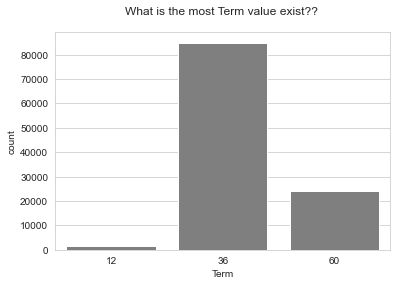

In [45]:
# let’s start with countplot for the term columns 
sns.countplot(data = sub_loan_clean, x = 'Term', color = color[7]);
plt.title('What is the most Term value exist?? \n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output.png',bbox_inches='tight');

#### What is the frequance of EmploymentStatus value exist ??

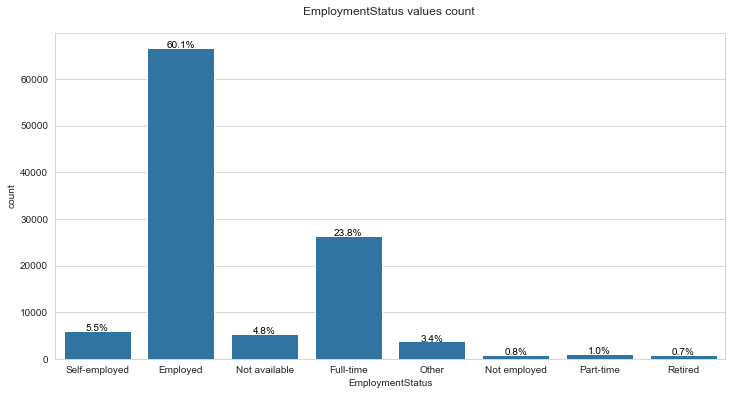

In [46]:
# let’s start with countplot for the EmploymentStatus columns 
plt.figure(figsize=(12,6))
sns.countplot(data = sub_loan_clean, x = 'EmploymentStatus', color = color[0]);

plt.title('EmploymentStatus values count \n ');

# setting the value of each columne on it
type_counts = sub_loan_clean['EmploymentStatus'].value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/sub_loan_clean.shape[0])
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')
    
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output1.png',bbox_inches='tight');    

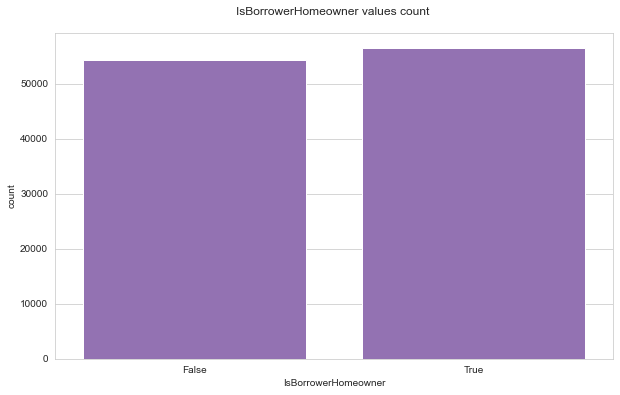

In [88]:
# let’s start with countplot for the IsBorrowerHomeowner columns 
plt.figure(figsize=(10,6))
sns.countplot(data = sub_loan_clean, x = 'IsBorrowerHomeowner', color = color[4]);

plt.title('IsBorrowerHomeowner values count \n ');


fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output2.png',bbox_inches='tight');

#### What is the frequance of IncomeRange values exist ??

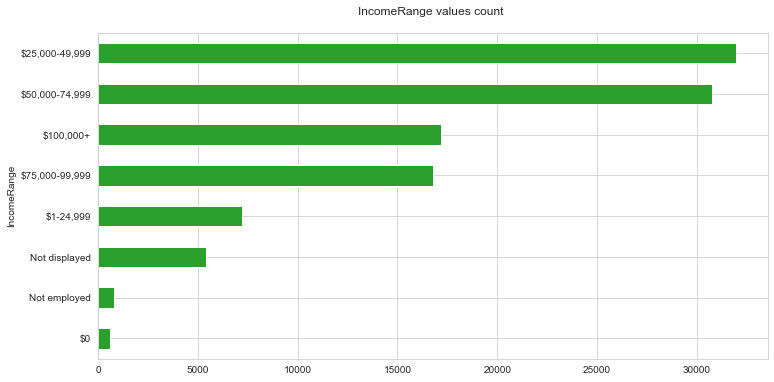

In [89]:
# ploting the IncomeRange count values after sorting them
plt.figure(figsize=(12,6))
sub_loan_clean['IncomeRange'].value_counts().sort_values(ascending=True).plot(kind='barh'
,xlabel='IncomeRange', title='IncomeRange values count \n ', color = color[2]);

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output3.png',bbox_inches='tight');

#### What’s the most status for a loan ? 

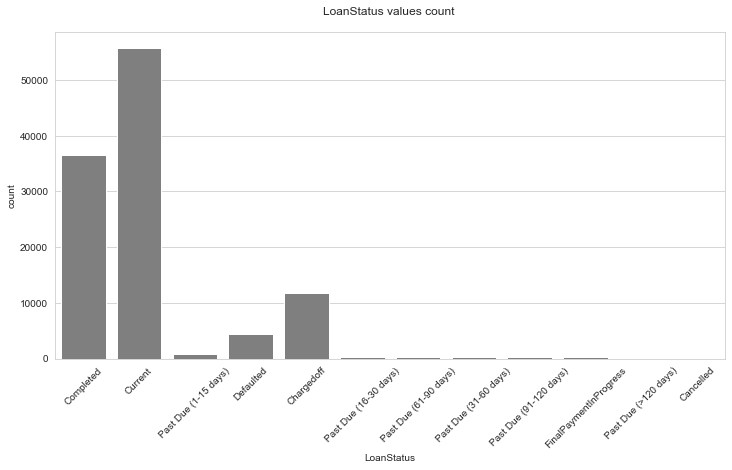

In [49]:
# let’s start with countplot for the LoanStatus columns 
plt.figure(figsize=(12,6))
sns.countplot(data = sub_loan_clean, x = 'LoanStatus', color = color[7]);
plt.xticks(rotation=45)
plt.title('LoanStatus values count \n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output4.png',bbox_inches='tight');

#### what is the Distribution of BorrowerRate??

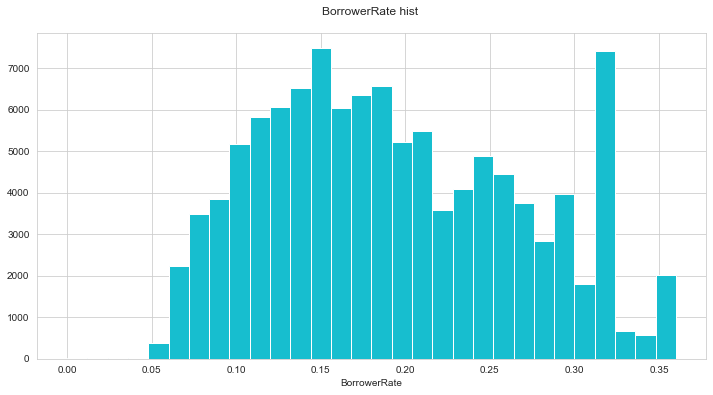

In [90]:
plt.figure(figsize=(12,6))
plt.hist(data=sub_loan_clean, x='BorrowerRate', bins=30, color = color[9]);
plt.title('BorrowerRate hist \n ');
plt.xlabel('BorrowerRate')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output5.png',bbox_inches='tight');

#### what is the Distribution of Investors ??

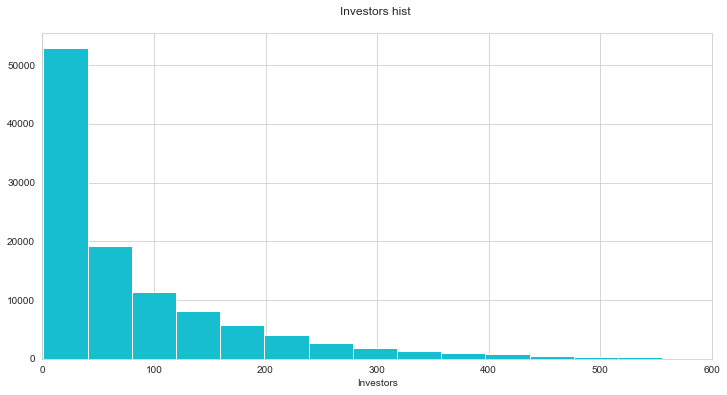

In [91]:
plt.figure(figsize=(12,6))
plt.hist(data=sub_loan_clean, x='Investors', bins=30, color = color[9]);
plt.title('Investors hist \n ');
plt.xlabel('Investors')
plt.xlim([0, 600])

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output6.png',bbox_inches='tight');

(0.0, 10.0)

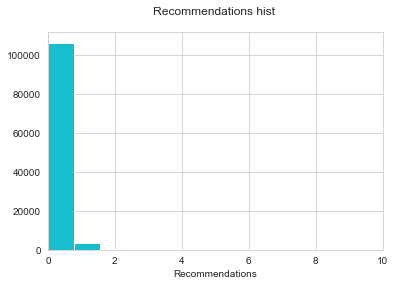

In [52]:
plt.hist(data=sub_loan_clean, x='Recommendations', bins=50, color = color[9]);
plt.title('Recommendations hist \n ');
plt.xlabel('Recommendations')
plt.xlim([0, 10])

#### what is the Distribution of LoanOriginationDate ??

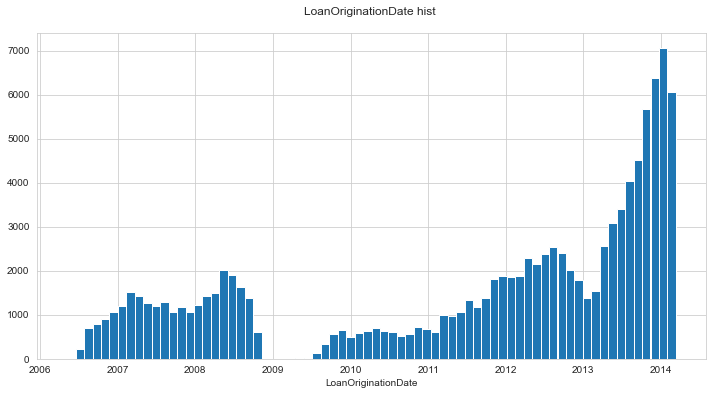

In [92]:
plt.figure(figsize=(12,6))
plt.hist(data=sub_loan_clean, x='LoanOriginationDate', bins=72, color=color[0]);
plt.title('LoanOriginationDate hist \n ');
plt.xlabel('LoanOriginationDate')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output7.png',bbox_inches='tight');

#### What is the distribution od loan over days, months and years ??

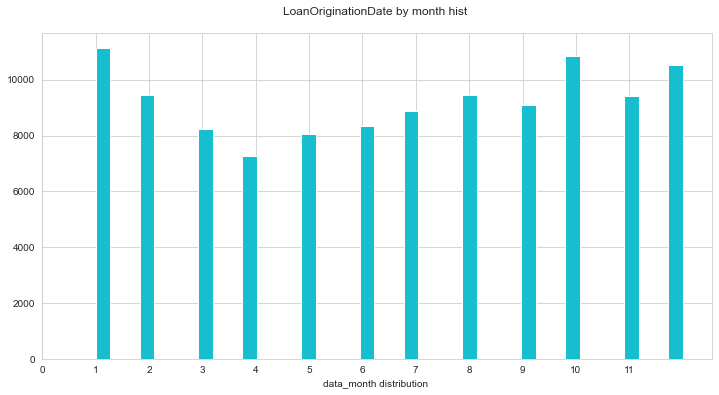

In [54]:
#preparing 
month_tricks=[0,1,2,3,4,5,6,7,8,9,10,11]
day_tricks=[0,1,2,3,4]

data_month =  sub_loan_clean['LoanOriginationDate'].dt.month
data_year =  sub_loan_clean['LoanOriginationDate'].dt.year
data_day =  sub_loan_clean['LoanOriginationDate'].dt.weekday

#ploting months
plt.figure(figsize=(12,6))
plt.hist(data_month, bins=40, color = color[9]);
plt.xticks(month_tricks)
plt.title('LoanOriginationDate by month hist \n ');
plt.xlabel('data_month distribution ')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output8.png',bbox_inches='tight');


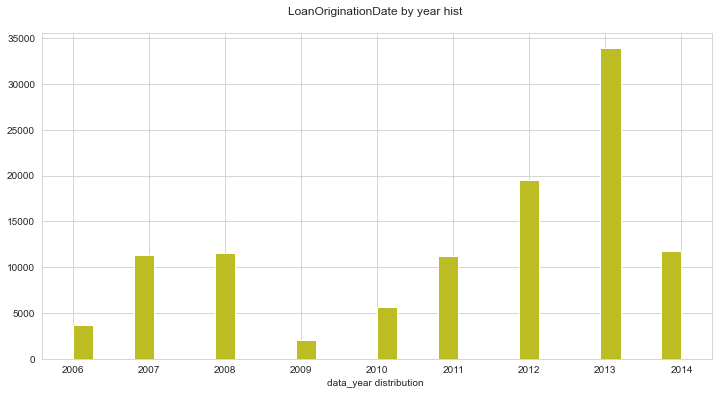

In [55]:
#ploting years
plt.figure(figsize=(12,6))
plt.hist(data_year, bins=30, color = color[8]);
plt.title('LoanOriginationDate by year hist \n ');
plt.xlabel('data_year distribution ')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output9.png',bbox_inches='tight');

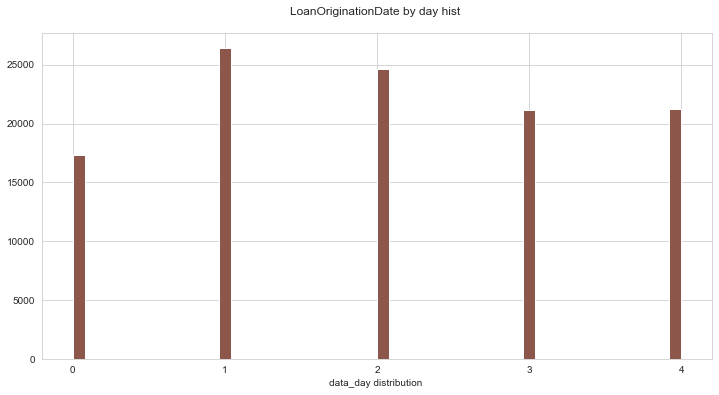

In [56]:
#ploting days
plt.figure(figsize=(12,6))
plt.hist(data_day, bins=50, color = color[5]);
plt.xticks(day_tricks)
plt.title('LoanOriginationDate by day hist \n ');
plt.xlabel('data_day distribution ')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output10.png',bbox_inches='tight');


In [57]:
print(data_month.value_counts())
print('\n')
print(data_year.value_counts())
print('\n')
print(data_day.value_counts())



1     11131
10    10859
12    10519
2      9454
8      9452
11     9432
9      9111
7      8878
6      8327
3      8241
5      8050
4      7269
Name: LoanOriginationDate, dtype: int64


2013    33912
2012    19553
2014    11734
2008    11547
2007    11352
2011    11228
2010     5652
2006     3698
2009     2047
Name: LoanOriginationDate, dtype: int64


1    26411
2    24608
4    21227
3    21186
0    17291
Name: LoanOriginationDate, dtype: int64


#### what is the Distribution of LoanOriginalAmount ??

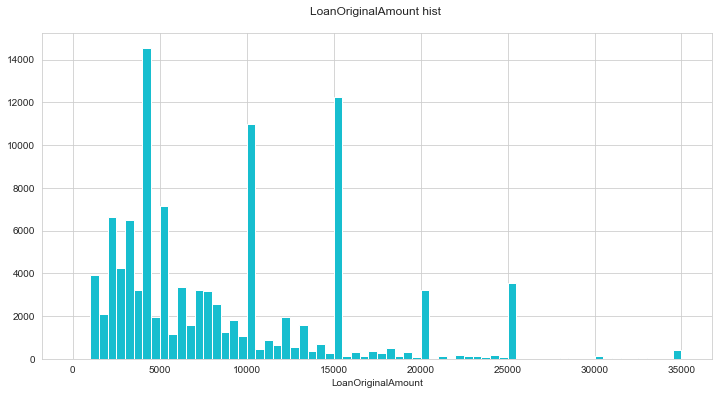

In [93]:
binsize = 500
bins = np.arange(0, sub_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=(12,6))

plt.hist(data=sub_loan_clean, x='LoanOriginalAmount', bins=bins, color = color[9]);
plt.title('LoanOriginalAmount hist \n ');
plt.xlabel('LoanOriginalAmount')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output11.png',bbox_inches='tight');

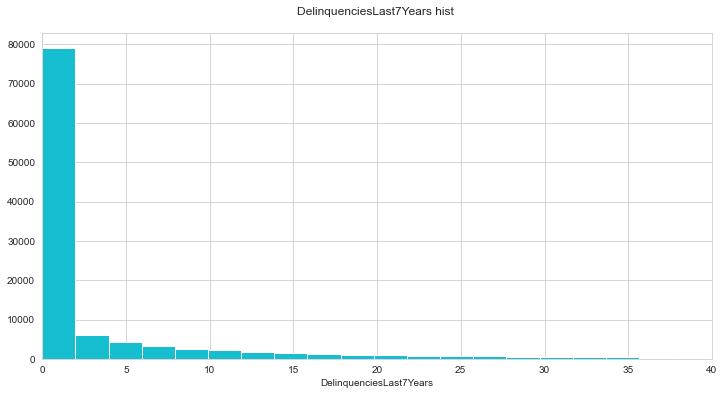

In [94]:
plt.figure(figsize=(12,6))

plt.hist(data=sub_loan_clean, x='DelinquenciesLast7Years', bins=50, color = color[9]);
plt.title('DelinquenciesLast7Years hist \n ');
plt.xlabel('DelinquenciesLast7Years')
plt.xlim([0, 40])

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output12.png',bbox_inches='tight');

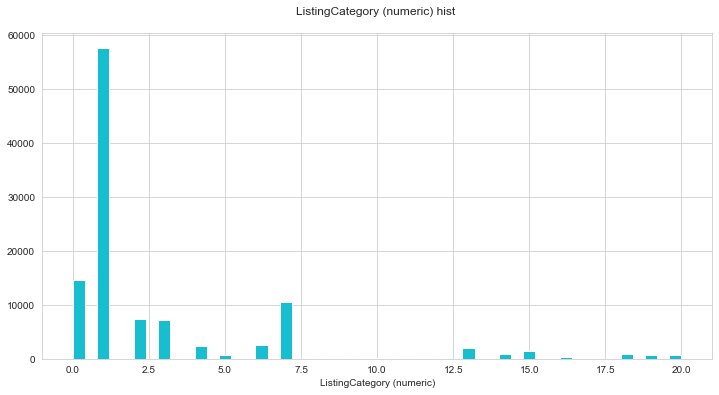

In [95]:
plt.figure(figsize=(12,6))

plt.hist(data=sub_loan_clean, x='ListingCategory (numeric)', bins=50, color = color[9]);
plt.title('ListingCategory (numeric) hist \n ');
plt.xlabel('ListingCategory (numeric)');


### Univariate_Exploration_Conclusions

- first part of the exploration is finished, some questions have been answeres above by graphs like:
    - What is the frequance of EmploymentStatus value exist ?
    - What is the frequance of IncomeRange values exist ?
    - What’s the most status for a loan ?
    - what is the Distribution of BorrowerRate?
    - what is the Distribution of Investors ?
    - what is the Distribution of LoanOriginationDate ?
    - What is the distribution od loan over days, months and years ?
    - what is the Distribution of LoanOriginalAmount ?

### Bivariate Exploration
- Now, To start off with bivarite exploration,
- In this section, investigate relationships between pairs of variables in your data.

#### what is colloration between columns ?

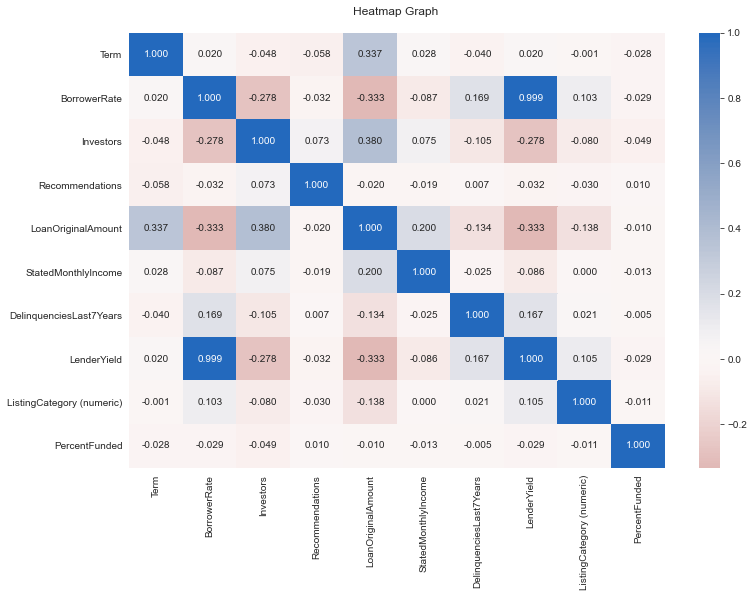

In [98]:
# correlation plot
plt.figure(figsize = [12, 8]);
sns.heatmap(num_sub_loan_clean.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

plt.title('Heatmap Graph \n ');

fig_plot = plt.gcf()
fig_plot.savefig('fig_plot_output13.png',bbox_inches='tight');

- Interestingly, there is no strong correlation between variables in this dataset except between BorrowerRate and lenderYield.

- There is some positive correlation between LoanOriginalAmount and Term, LoanOriginalAmount and StatedMonthlyIncome, LoanOriginalAmount and number of Investors, number of delinquencies and borrowers rate, Recommendations and TotalProsperLoans.

- There is also negative correlation between lenderYield and number of investors, LoanOriginalAmount and lenderYield, LoanOriginalAmount and borrower rate and number of investors and borrower rate.

<Figure size 864x864 with 0 Axes>

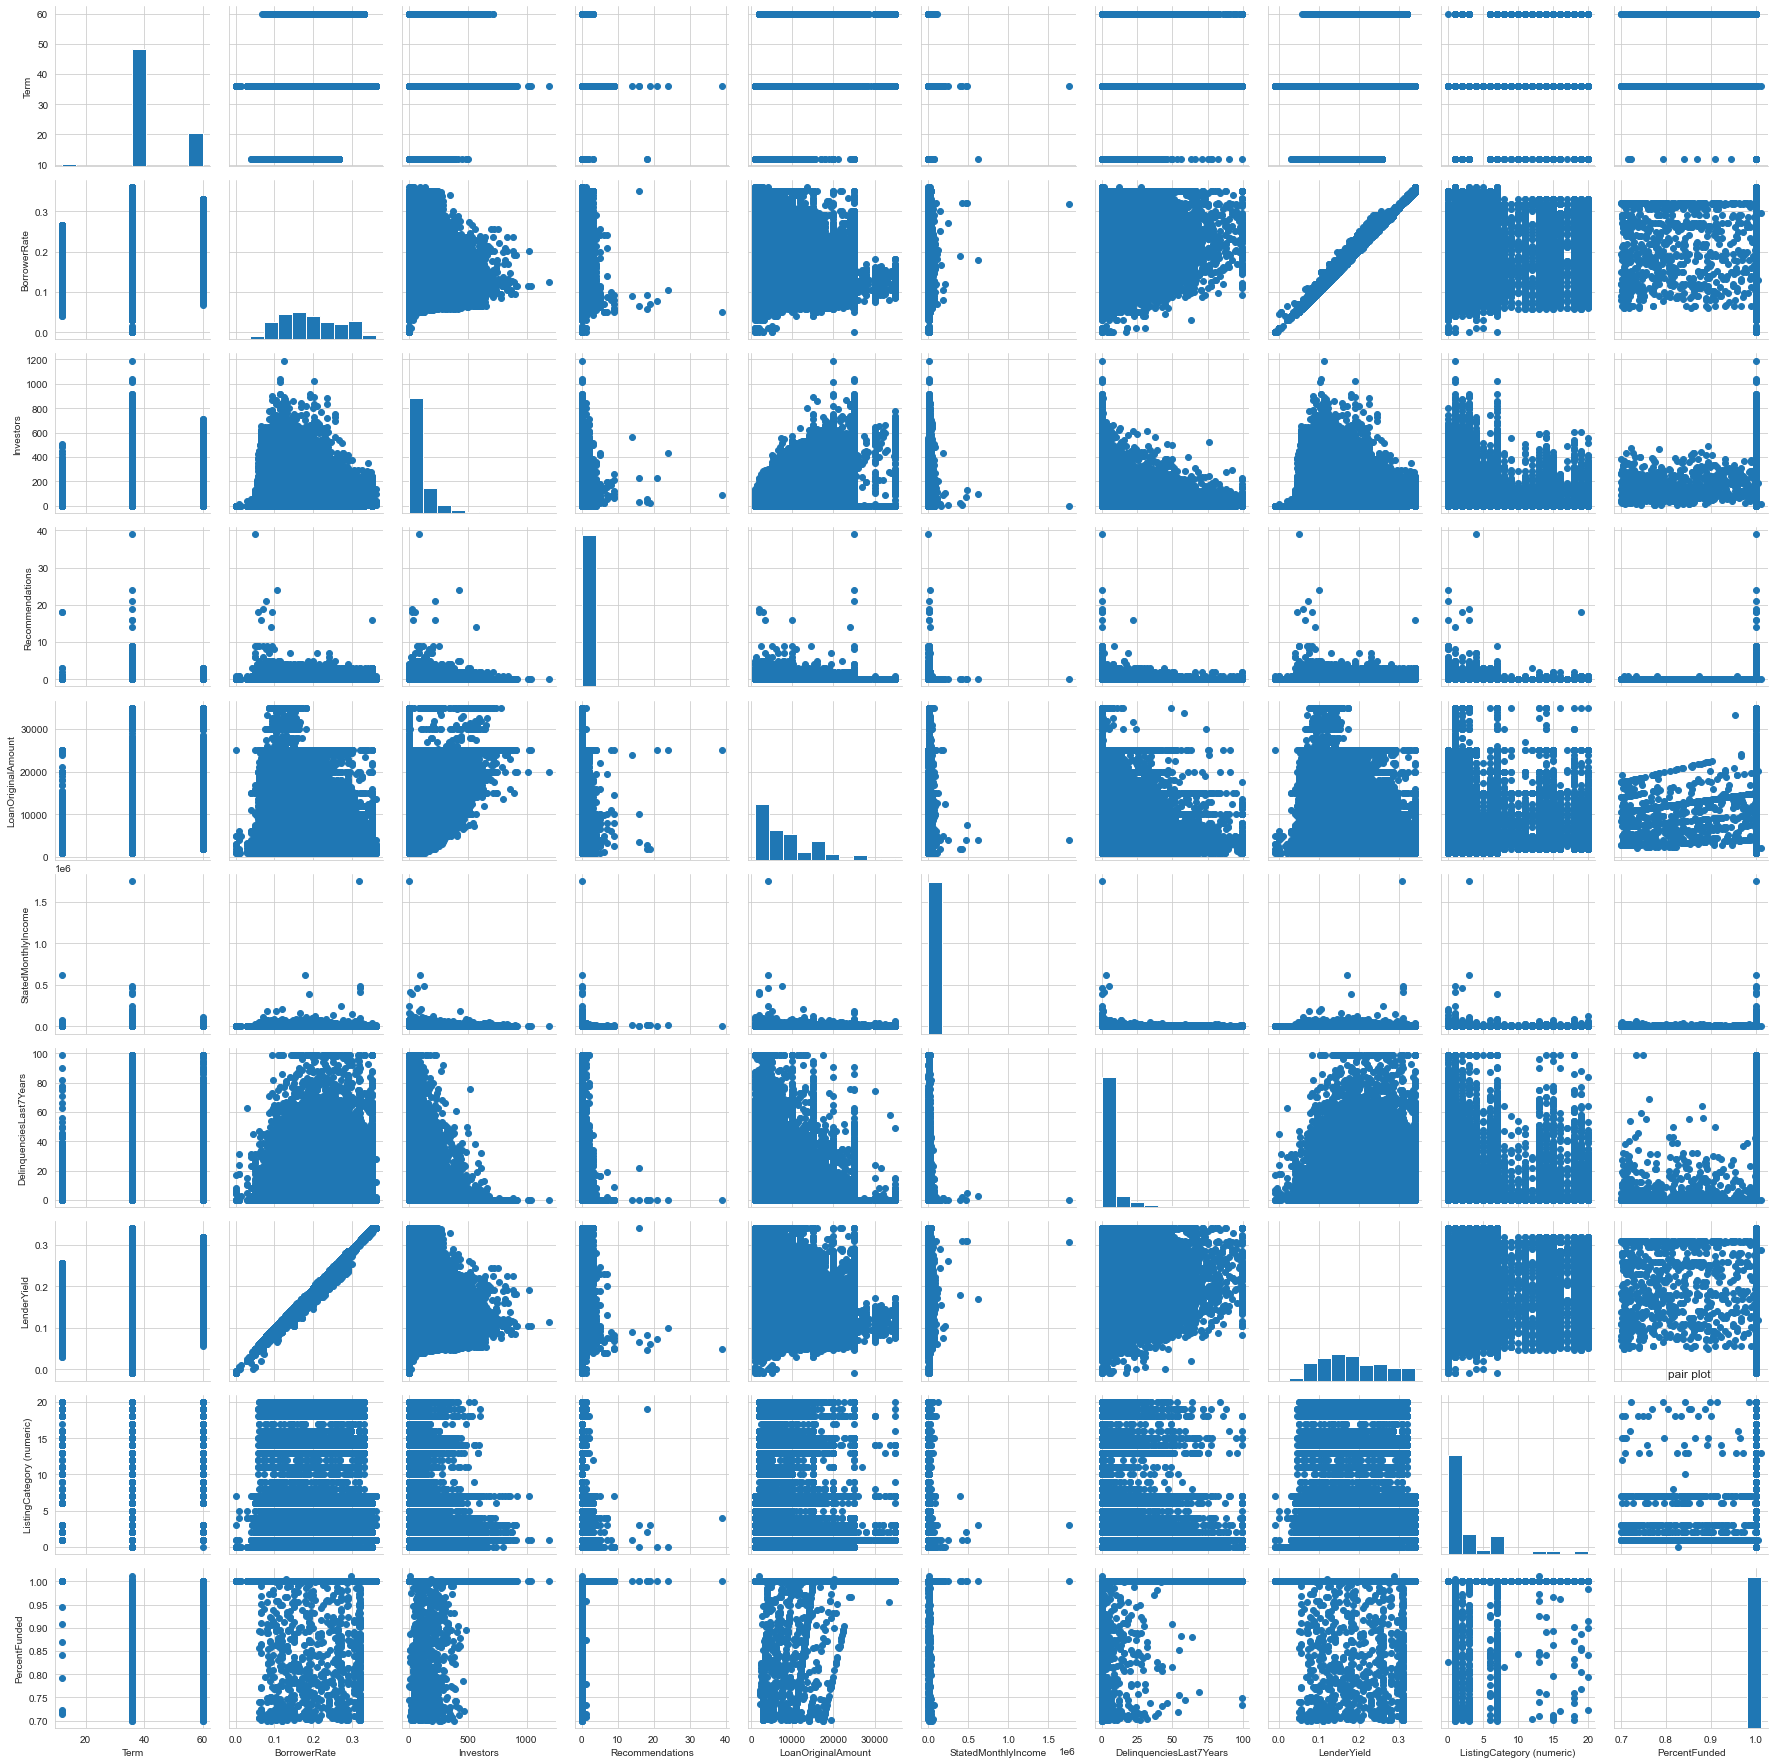

In [102]:
# plot matrix:
plt.figure(figsize = [12, 12]);
g = sns.PairGrid(data = num_sub_loan_clean);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

plt.title('pair plot \n')

fig_plot = plt.gcf(); 
fig_plot.savefig('fig_plot_output14.png',bbox_inches='tight');

#### which income range is BorrowerHomeowner ?

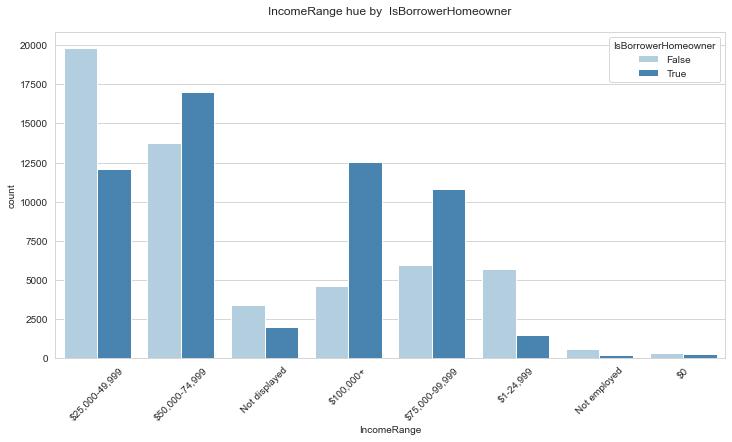

In [101]:
# ploting the IncomeRange count values after sorting them
plt.figure(figsize=(12,6))

sns.countplot(data=sub_loan_clean, x='IncomeRange', hue='IsBorrowerHomeowner', palette='Blues');
plt.xticks(rotation=45)
plt.title('IncomeRange hue by  IsBorrowerHomeowner\n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output15.png',bbox_inches='tight');

- we can see IncomeRange with hue by IsBorrowerHomeowner, three section have the true hue over false one and income between 25,000 and 49,999 was the max including number of who has loans.

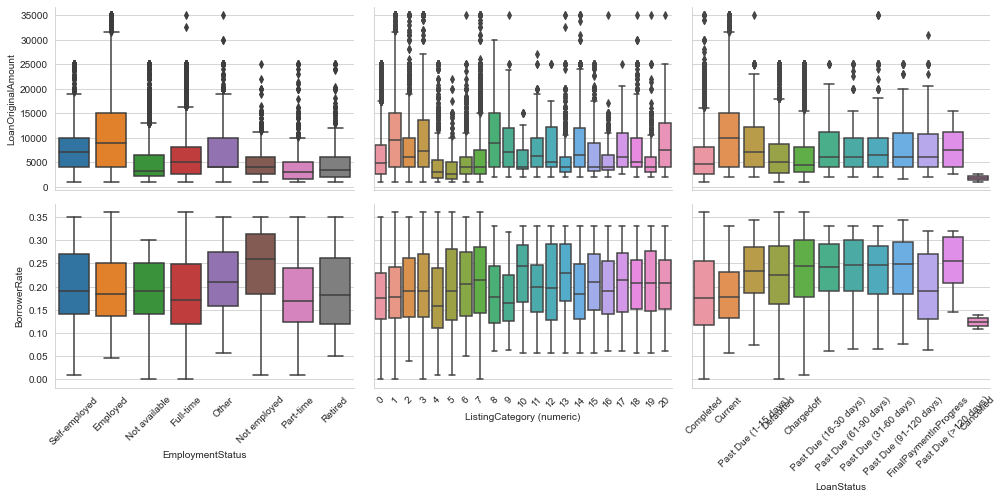

In [109]:
#LoanStatus ,EmploymentStatus ,IncomeRange,  
num_vars = ['LoanOriginalAmount', 'BorrowerRate']
cat_vars = ['EmploymentStatus', 'ListingCategory (numeric)', 'LoanStatus']


def box_grid(c1, c2, **kwargs):
    sns.boxplot(x=c1,y=c2)
    plt.xticks(rotation=45)

g = sns.PairGrid(data = sub_loan_clean, y_vars = num_vars, x_vars = cat_vars,
                height = 3, aspect = 1.5);
g.map(box_grid);

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 6);
    
fig_plot = plt.gcf(); 
fig_plot.savefig('fig_plot_output16.png',bbox_inches='tight');

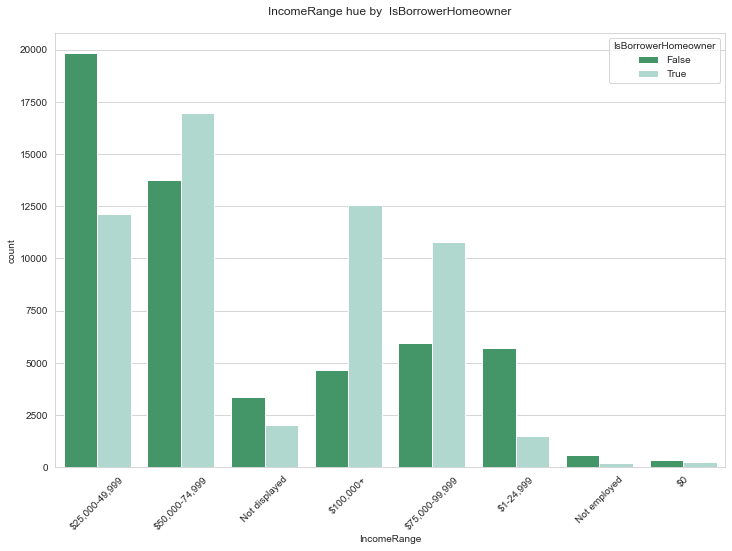

In [103]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 8])

sns.countplot(data = sub_loan_clean, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'BuGn_r')
plt.xticks(rotation=45)
#plt.show()
plt.title('IncomeRange hue by  IsBorrowerHomeowner\n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output17.png',bbox_inches='tight');

#### What is the EmploymentStatus for them?
#### Is hue by BorrowerHomeowner show diffrence in a spacific status?!

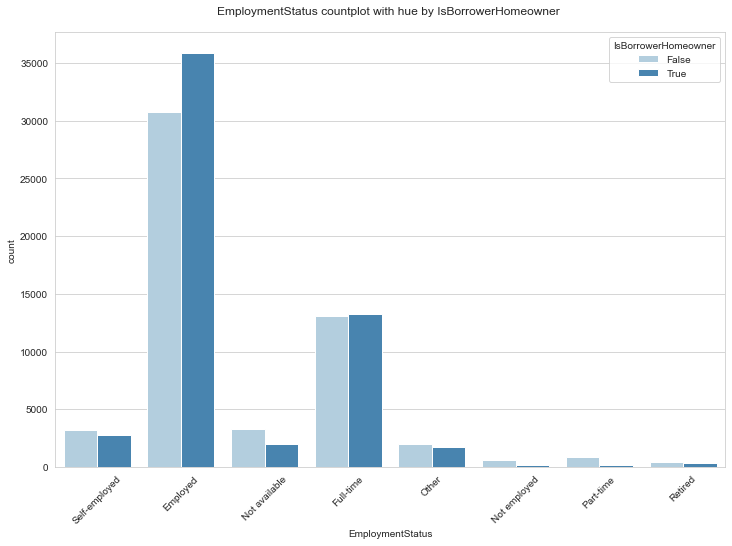

In [105]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 8]);

sns.countplot(data = sub_loan_clean, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues');
plt.xticks(rotation=45)
plt.title('EmploymentStatus countplot with hue by IsBorrowerHomeowner \n');

fig_plot = plt.gcf();
fig_plot.savefig('fig_plot_output18.png',bbox_inches='tight');

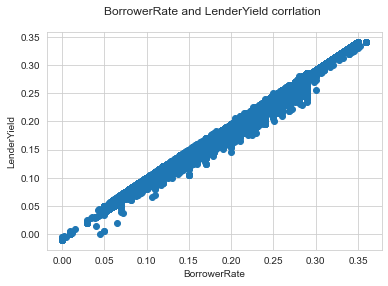

In [67]:
# BorrowerRate and LenderYield have corrlation near to 1
plt.scatter(sub_loan_clean['BorrowerRate'], sub_loan_clean['LenderYield' ])
plt.title('BorrowerRate and LenderYield corrlation \n')
plt.xlabel('BorrowerRate')
plt.ylabel('LenderYield')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output19.png',bbox_inches='tight');

#### Is IsBorrowerHomeowner change over Term values?

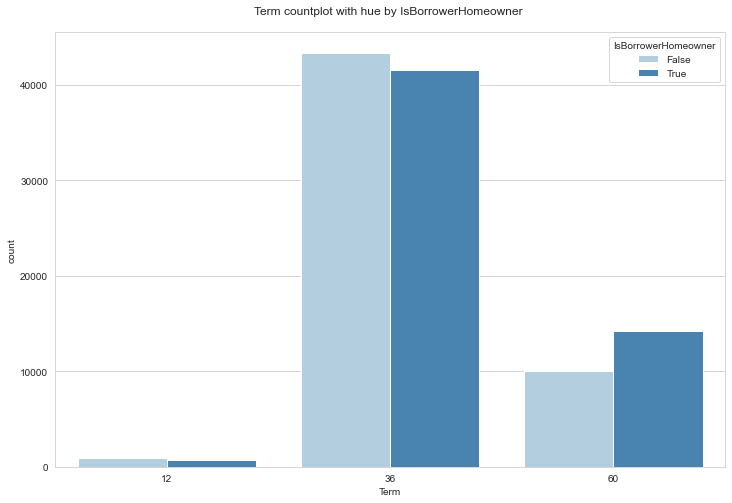

In [110]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 8]);

sns.countplot(data = sub_loan_clean, x = 'Term', hue = 'IsBorrowerHomeowner', palette = 'Blues');
plt.title('Term countplot with hue by IsBorrowerHomeowner \n');

fig_plot = plt.gcf();
fig_plot.savefig('fig_plot_output20.png',bbox_inches='tight');

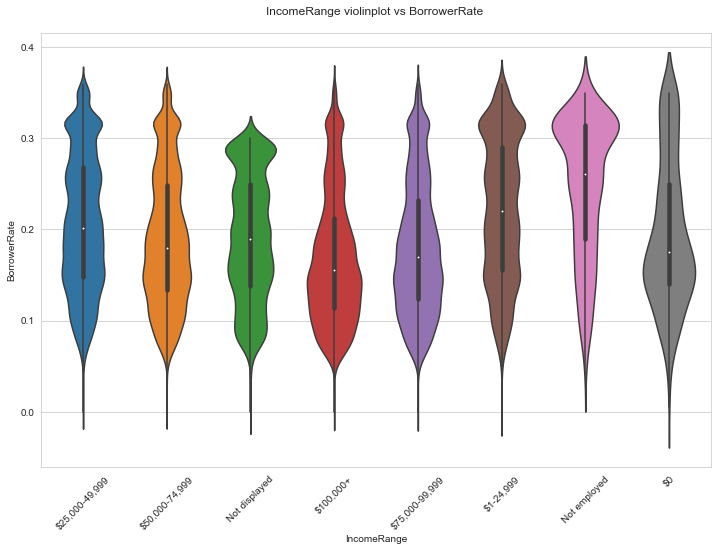

In [69]:
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate')

plt.xticks(rotation=45)
plt.title('IncomeRange violinplot vs BorrowerRate \n')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output21.png',bbox_inches='tight');

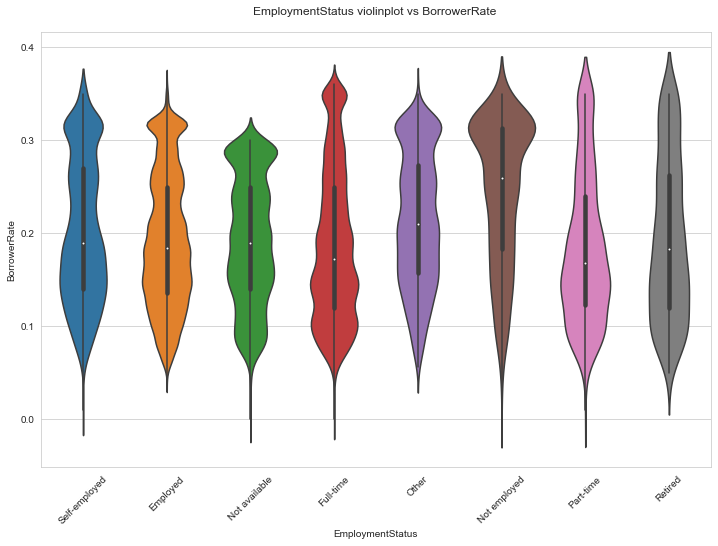

In [70]:
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate')

plt.xticks(rotation=45)
plt.title('EmploymentStatus violinplot vs BorrowerRate \n')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output22.png',bbox_inches='tight');

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- there is a strong correlation between BorrowerRate and lenderYield, and other insights about correlation above after the heatmap.
- IncomeRange with hue by IsBorrowerHomeowner, three section have the true hue over false one and income between 25,000 and 49,999 was the max including number of who has loans.
- Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.
- Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. 
- and answer quation like:
    - What is the EmploymentStatus for them?
    - Is hue by BorrowerHomeowner show diffrence in a spacific status?!
    - Is IsBorrowerHomeowner change over Term values?

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- strong correlation between BorrowerRate and lenderYield, and interesting thing I've observed is that mid-Term (36) is the most frequent Term.

### Multivariate Exploration

- Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.



In [71]:
sub_loan_clean.head()

,Term,LoanStatus,BorrowerRate,EmploymentStatus,IncomeRange,Investors,Recommendations,LoanOriginationQuarter,LoanOriginationDate,LoanOriginalAmount,StatedMonthlyIncome,DelinquenciesLast7Years,LenderYield,IsBorrowerHomeowner,ListingCategory (numeric),PercentFunded
0,36,Completed,0.1580,Self-employed,"$25,000-49,999",258,0,Q3 2007,2007-09-12,9425,3083.333333,4.0,0.1380,True,0,1.0
1,36,Current,0.0920,Employed,"$50,000-74,999",1,0,Q1 2014,2014-03-03,10000,6125.000000,0.0,0.0820,False,2,1.0
2,36,Completed,0.2750,Not available,Not displayed,41,0,Q1 2007,2007-01-17,3001,2083.333333,0.0,0.2400,False,0,1.0
3,36,Current,0.0974,Employed,"$25,000-49,999",158,0,Q4 2012,2012-11-01,10000,2875.000000,14.0,0.0874,True,16,1.0
4,36,Current,0.2085,Employed,"$100,000+",20,0,Q3 2013,2013-09-20,15000,9583.333333,0.0,0.1985,True,2,1.0


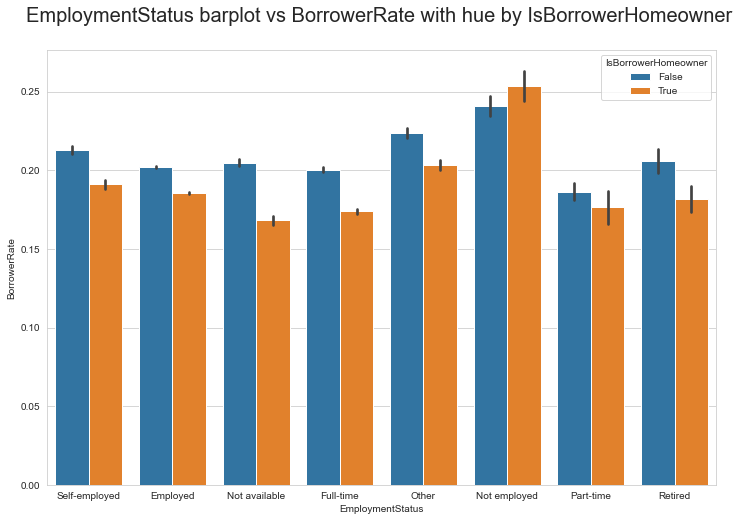

In [72]:
#
#
plt.figure(figsize = [12, 8])

sns.barplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('EmploymentStatus barplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output23.png',bbox_inches='tight');



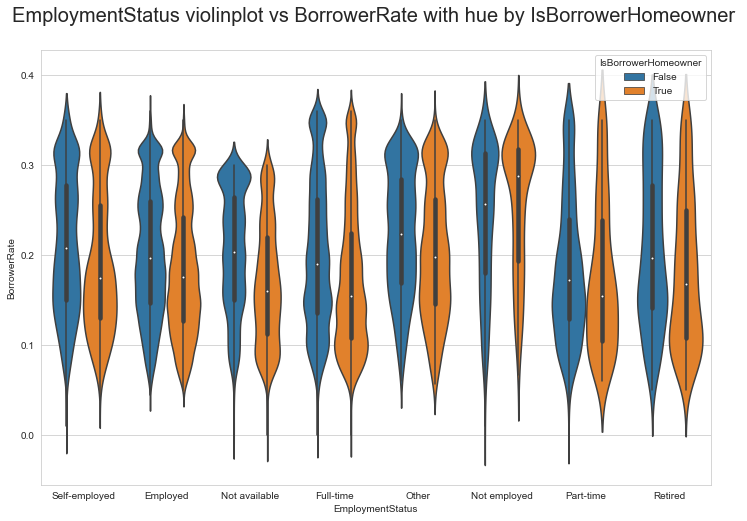

In [73]:
#
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('EmploymentStatus violinplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output24.png',bbox_inches='tight');


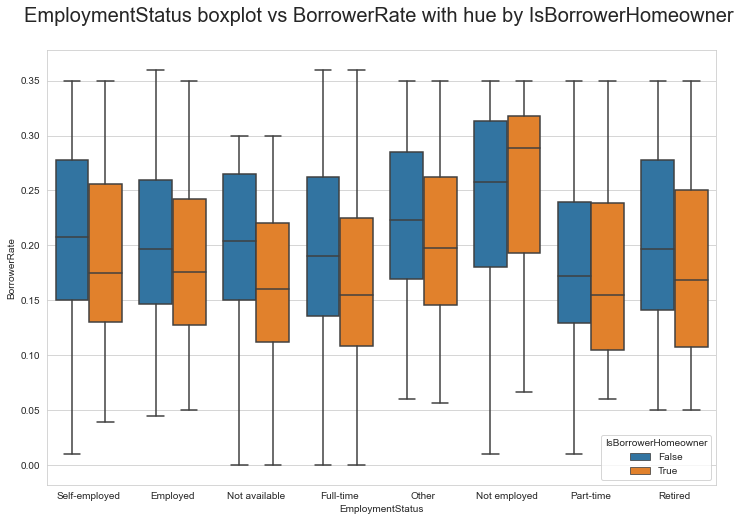

In [111]:
#
plt.figure(figsize = [12, 8])

sns.boxplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('EmploymentStatus boxplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output25.png',bbox_inches='tight');

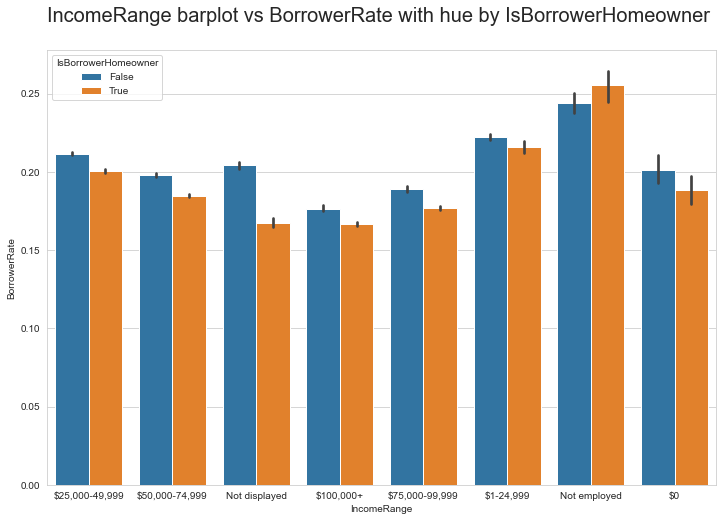

In [75]:
#
#
plt.figure(figsize = [12, 8])

sns.barplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('IncomeRange barplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output26.png',bbox_inches='tight');


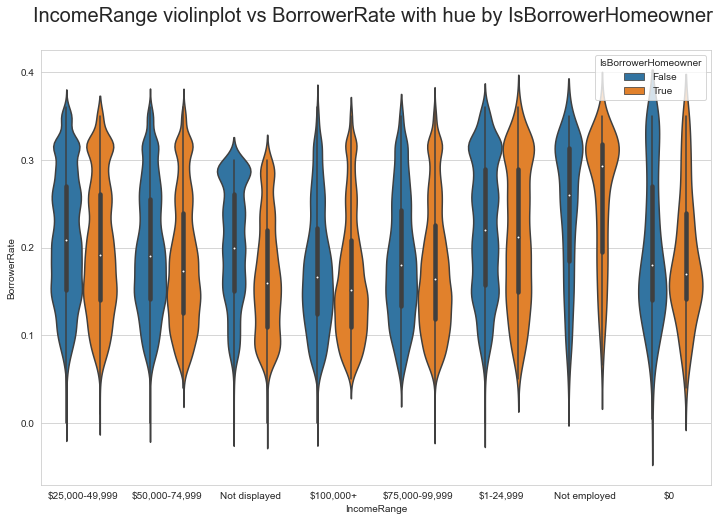

In [76]:
#
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('IncomeRange violinplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output27.png',bbox_inches='tight');


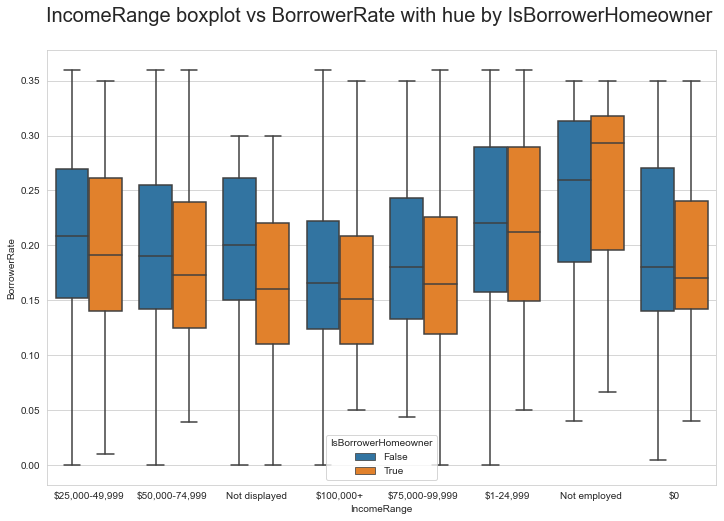

In [77]:
#
plt.figure(figsize = [12, 8])

sns.boxplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('IncomeRange boxplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output28.png',bbox_inches='tight');

plt.show()

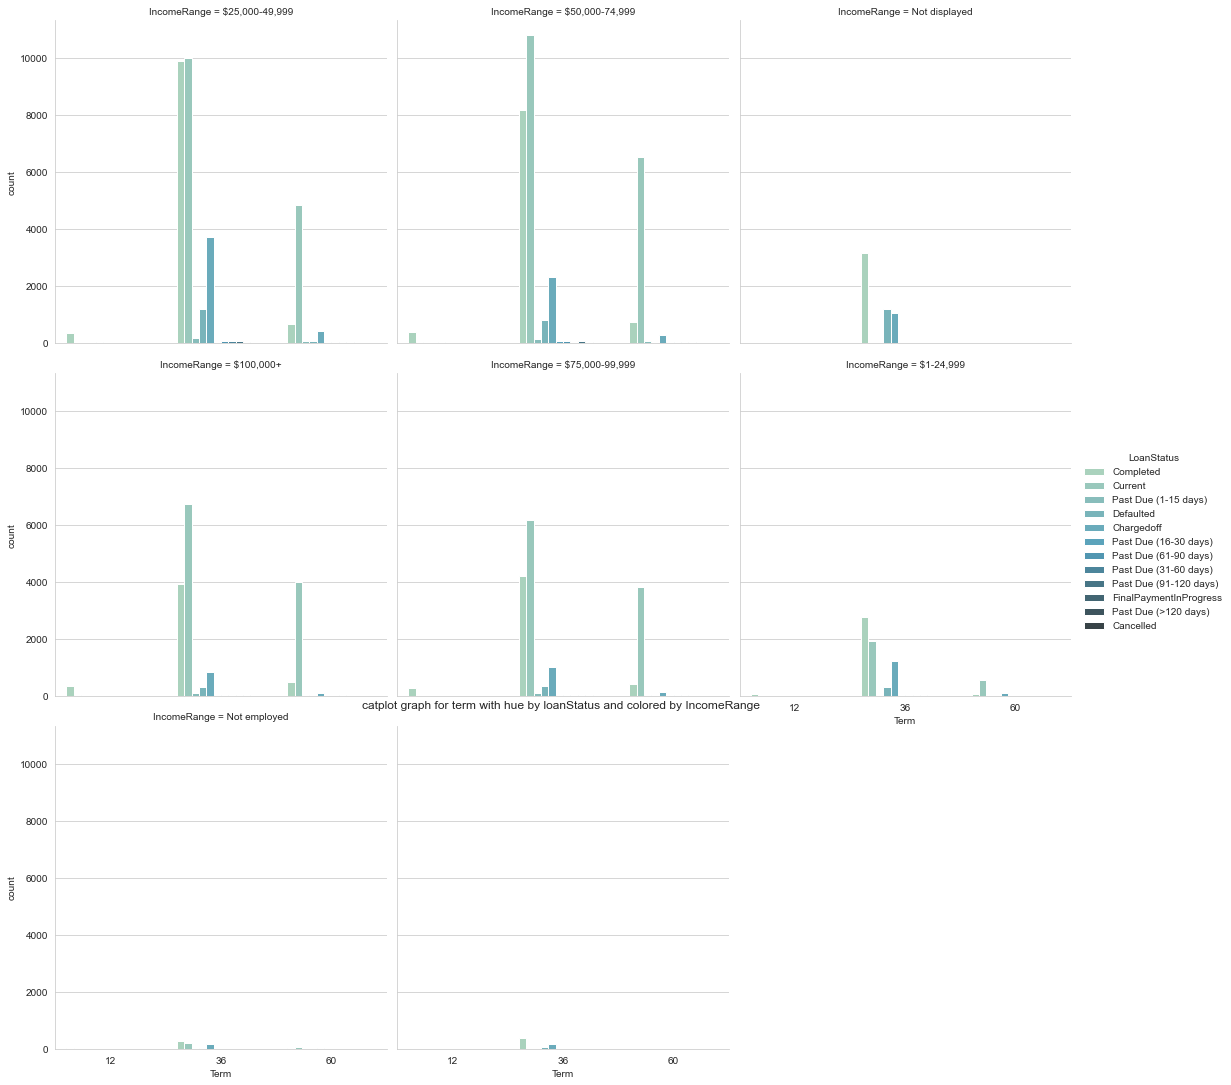

In [112]:
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8);

sns.catplot(x='Term', hue='LoanStatus', col='IncomeRange',
              data=sub_loan_clean, kind='count', palette='GnBu_d', col_wrap=3 );
plt.title('catplot graph for term with hue by loanStatus and colored by IncomeRange \n ');

fig_plot = plt.gcf() ;
fig_plot.savefig('fig_plot_output30.png',bbox_inches='tight');

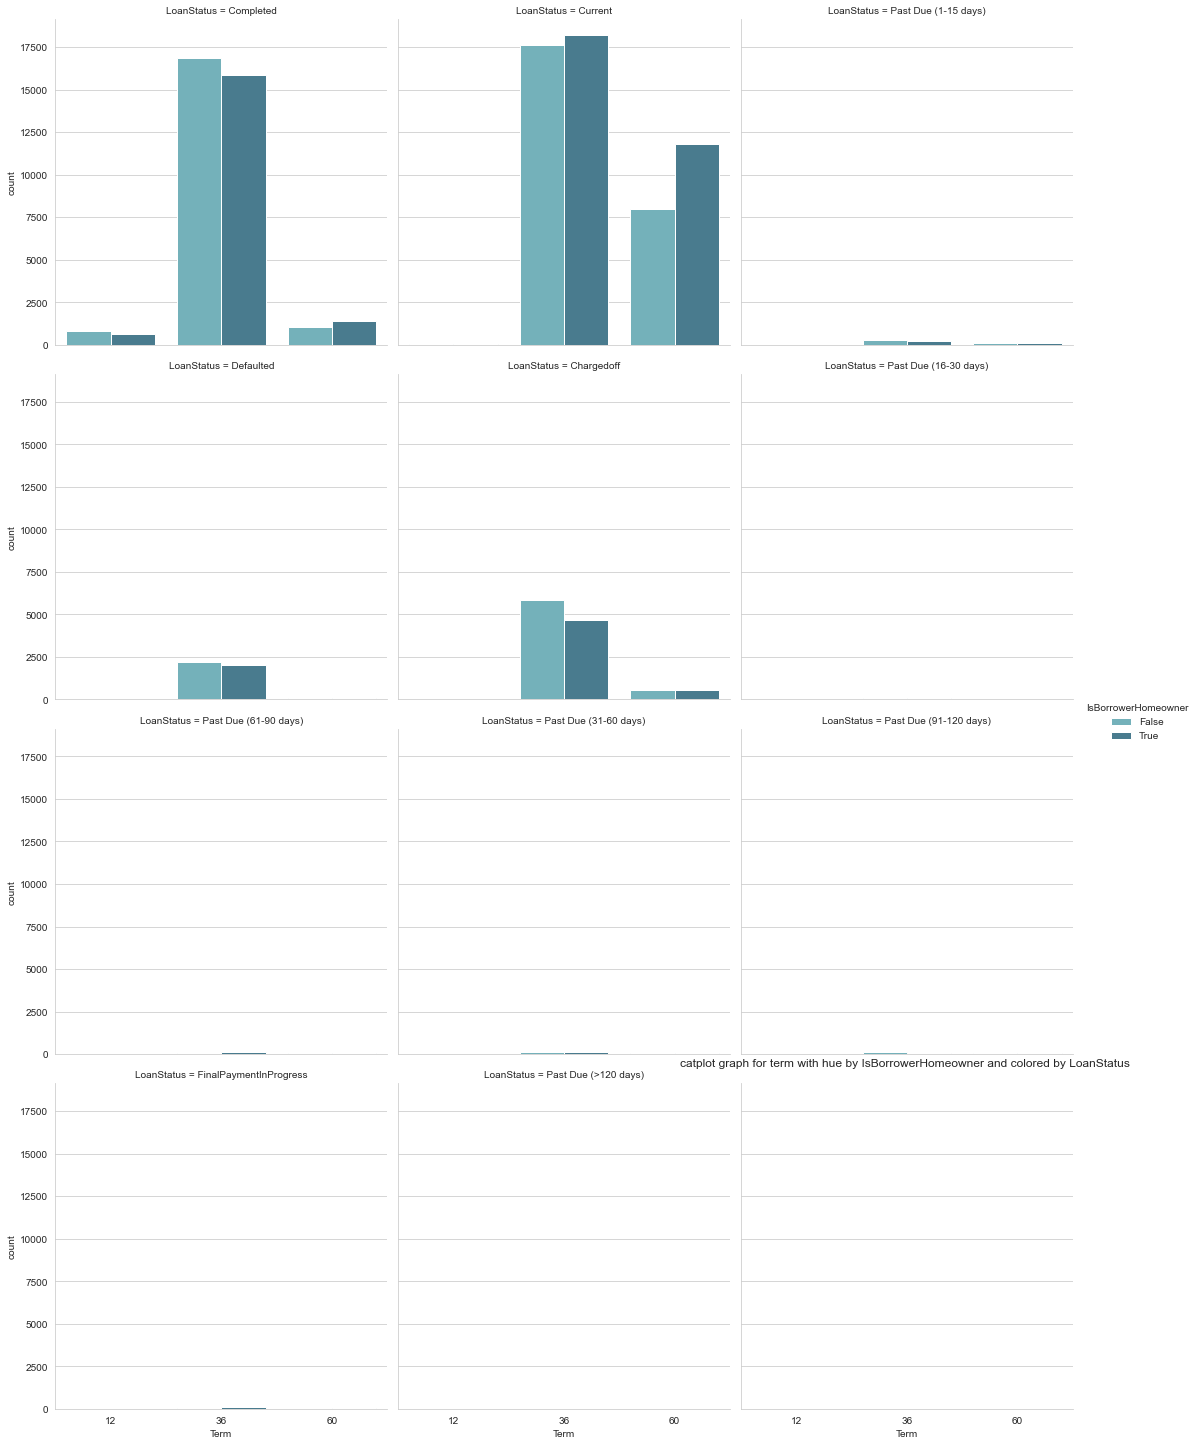

In [113]:
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8);

sns.catplot(x='Term', hue='IsBorrowerHomeowner', col='LoanStatus',
              data=sub_loan_clean, kind='count', palette='GnBu_d', col_wrap=3 );
plt.title('catplot graph for term with hue by IsBorrowerHomeowner and colored by LoanStatus \n ');

fig_plot = plt.gcf() ;
fig_plot.savefig('fig_plot_output31.png',bbox_inches='tight');

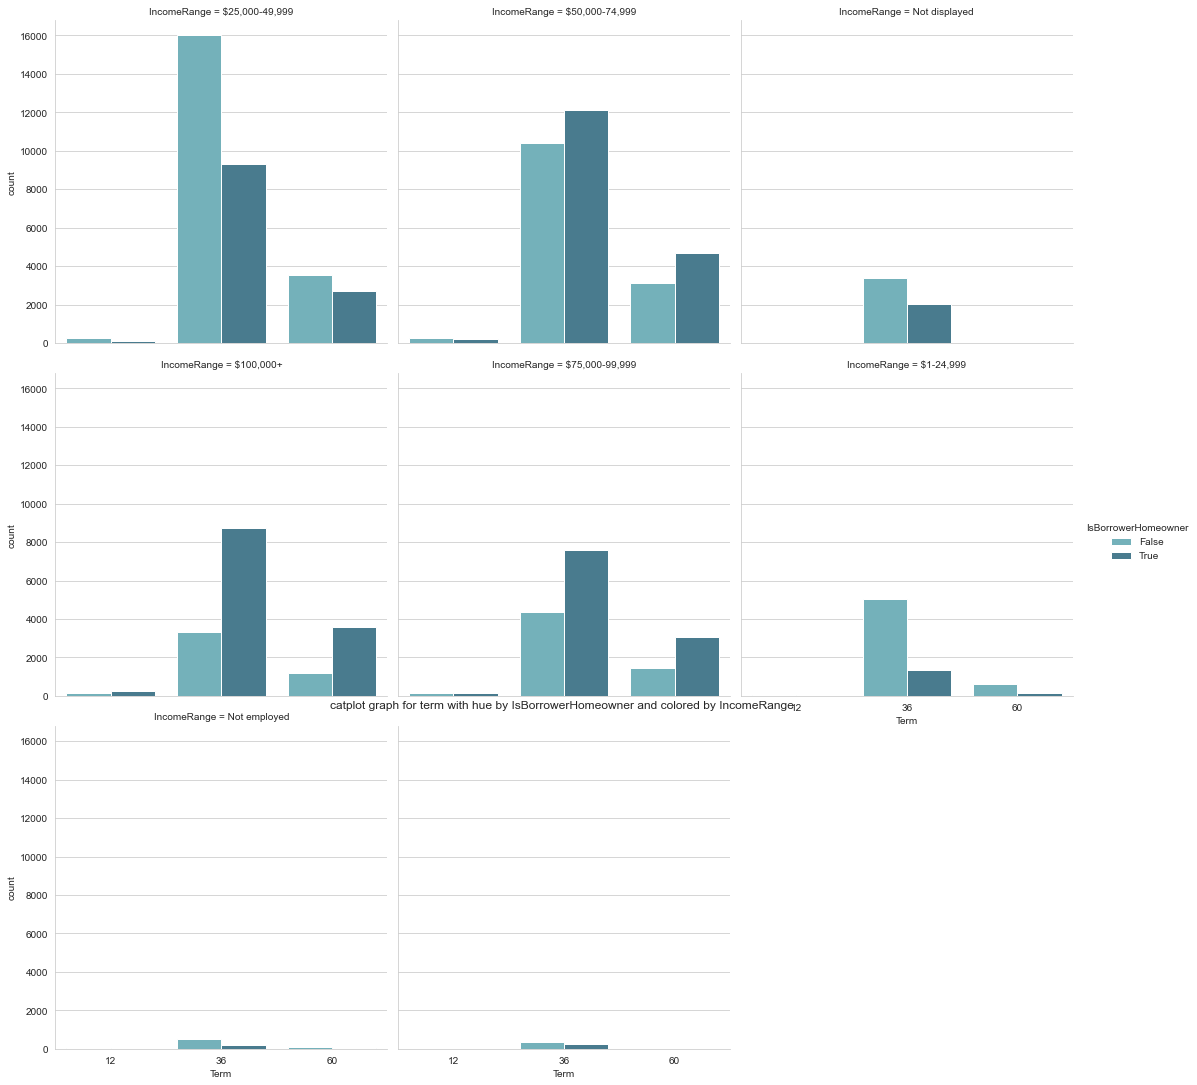

In [114]:
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8);

sns.catplot(x='Term', hue='IsBorrowerHomeowner', col='IncomeRange',
              data=sub_loan_clean, kind='count', palette='GnBu_d', col_wrap=3);
plt.title('catplot graph for term with hue by IsBorrowerHomeowner and colored by IncomeRange \n ');

fig_plot = plt.gcf(); 
fig_plot.savefig('fig_plot_output33.png',bbox_inches='tight');

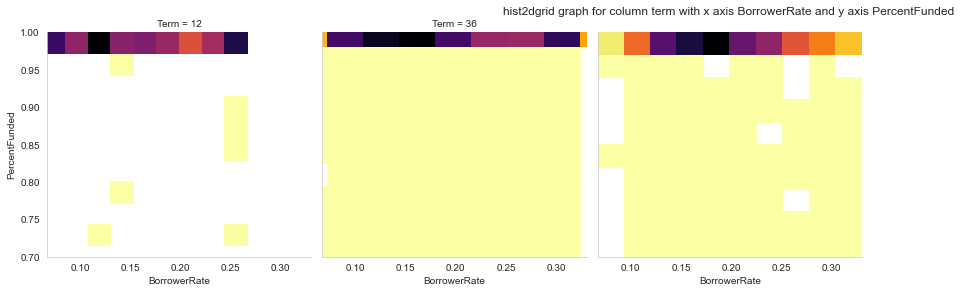

In [81]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
   
    plt.hist2d(x, y,  cmap = palette, cmin = 0.5)
    

# create faceted heat maps on levels of the cut variable
g = sns.FacetGrid(data = sub_loan_clean, col = 'Term', col_wrap = 4, height = 4,
                 )
g.map(hist2dgrid, 'BorrowerRate', 'PercentFunded', color = 'inferno_r')
g.set_xlabels('BorrowerRate')
g.set_ylabels('PercentFunded')

plt.title('hist2dgrid graph for column term with x axis BorrowerRate and y axis PercentFunded \n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output34.png',bbox_inches='tight');

plt.show()

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- Our initial assumptions were strengthened. The outcome of credit depends on IncomeRange, Term, Employment status. Defaulted credits tend to be larger than completed for all ratings except the lowest ones. Not Employee has highest BorrowerRate. mid term (36 month) is the highest BorrowerRate. income range over than $75,000  tend to have mid_term(36).


#### Were there any interesting or surprising interactions between features?
- Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the features. However, the features also aren't fully independent and have weak corrloration. But it is interesting in something like the BorrowerRate plot for each one against IncomeRange, Term and Employmentstatus. 